In [3]:
# import library
import numpy as np
import csv
import matplotlib.pyplot as plt
from math import pi

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
import time

In [4]:
#IMPORTANT : import the DataPreprocessing class
from DataPreprocessing import DataPreprocessing

In [5]:
cluster1=pd.read_csv('./clustered_data/cluster_1.csv').sort_values(['Year', 'Month', 'Day'], ascending=[True, True,True])
cluster2=pd.read_csv('./clustered_data/cluster_2.csv').sort_values(['Year', 'Month', 'Day'], ascending=[True, True,True])
cluster3=pd.read_csv('./clustered_data/cluster_3.csv').sort_values(['Year', 'Month', 'Day'], ascending=[True, True,True])
cluster4=pd.read_csv('./clustered_data/cluster_4.csv').sort_values(['Year', 'Month', 'Day'], ascending=[True, True,True])
cluster5=pd.read_csv('./clustered_data/cluster_5.csv').sort_values(['Year', 'Month', 'Day'], ascending=[True, True,True])

In [6]:
#Data preprocessing
DP = DataPreprocessing()

In [7]:
#We will only use the "Rainfall" column
time_series_df1 = cluster1[["Rainfall"]]
time_series_df2 = cluster2[["Rainfall"]]
time_series_df3 = cluster3[["Rainfall"]]
time_series_df4 = cluster4[["Rainfall"]]
time_series_df5 = cluster5[["Rainfall"]]

In [32]:
#We need to specify the column that corresponds to the time series (Rainfall) and the time horizon (40)
X1, y1 = DP.create_dataset_in_time_series_form(entire_dataframe=time_series_df1, time_series_column="Rainfall", time_horizon=5)
X2, y2 = DP.create_dataset_in_time_series_form(entire_dataframe=time_series_df2, time_series_column="Rainfall", time_horizon=5)
X3, y3 = DP.create_dataset_in_time_series_form(entire_dataframe=time_series_df3, time_series_column="Rainfall", time_horizon=5)
X4, y4 = DP.create_dataset_in_time_series_form(entire_dataframe=time_series_df4, time_series_column="Rainfall", time_horizon=5)
X5, y5 = DP.create_dataset_in_time_series_form(entire_dataframe=time_series_df5, time_series_column="Rainfall", time_horizon=5)

# split data in training, validation and  testing data.
90% for training data

20% for testing data

In [33]:
Xtrain1,Xtest1, ytrain1, ytest1 = train_test_split(X1, y1,test_size=0.2 )
Xtrain2,Xtest2, ytrain2, ytest2 = train_test_split(X2, y2,test_size=0.2 )
Xtrain3,Xtest3, ytrain3, ytest3 = train_test_split(X3, y3,test_size=0.2 )
Xtrain4,Xtest4, ytrain4, ytest4 = train_test_split(X4, y4,test_size=0.2 )
Xtrain5,Xtest5, ytrain5, ytest5 = train_test_split(X5, y5,test_size=0.2 )

In [57]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train1,y_train1 = min_max_scaler.fit_transform(Xtrain1), min_max_scaler.fit_transform(ytrain1)
X_test1, y_test1  = min_max_scaler.transform(Xtest1), min_max_scaler.transform(ytest1)

X_train2,y_train2 = min_max_scaler.fit_transform(Xtrain2), min_max_scaler.fit_transform(ytrain2)
X_test2, y_test2  = min_max_scaler.transform(Xtest2), min_max_scaler.transform(ytest2)

X_train3,y_train3 = min_max_scaler.fit_transform(Xtrain3), min_max_scaler.fit_transform(ytrain3)
X_test3, y_test3  = min_max_scaler.transform(Xtest3), min_max_scaler.transform(ytest3)

X_train4,y_train4 = min_max_scaler.fit_transform(Xtrain4), min_max_scaler.fit_transform(ytrain4)
X_test4, y_test4  = min_max_scaler.transform(Xtest4), min_max_scaler.transform(ytest4)

X_train5,y_train5 = min_max_scaler.fit_transform(Xtrain5), min_max_scaler.fit_transform(ytrain5)
X_test5, y_test5  = min_max_scaler.transform(Xtest5), min_max_scaler.transform(ytest5)

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }
adaboost = AdaBoostRegressor(random_state=42)
pre_gs_inst = GridSearchCV(estimator=adaboost,
 param_grid = param_grid,
 cv=2,
 n_jobs=-1,
 verbose=2)

pre_gs_inst.fit(X_train1, y_train1)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV] learning_rate=0.01, loss=linear, n_estimators=50 ................
[CV] learning_rate=0.01, loss=linear, n_estimators=50 ................
[CV] learning_rate=0.01, loss=linear, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=linear, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=square, n_estimators=50 ................
[CV] learning_rate=0.01, loss=square, n_estimators=50 ................
[CV] learning_rate=0.01, loss=square, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=square, n_estimators=100 ...............
[CV] ....... learning_rate=0.01, loss=linear, n_estimators=50 -   0.3s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50 ...........
[CV] ....... learning_rate=0.01, loss=linear, n_estimators=50 -   0.3s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50 ...........
[CV] ....... learning_rate=0.01, loss=square, n_estimators=50 -   0.3s
[CV] learning_ra

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.0s


[CV] . learning_rate=0.05, loss=exponential, n_estimators=100 -   0.8s
[CV] learning_rate=0.1, loss=exponential, n_estimators=50 ............
[CV] ........ learning_rate=0.1, loss=square, n_estimators=50 -   0.3s
[CV] learning_rate=0.1, loss=exponential, n_estimators=100 ...........
[CV] ........ learning_rate=0.1, loss=square, n_estimators=50 -   0.4s
[CV] learning_rate=0.1, loss=exponential, n_estimators=100 ...........
[CV] ....... learning_rate=0.1, loss=linear, n_estimators=100 -   0.7s
[CV] learning_rate=0.3, loss=linear, n_estimators=50 .................
[CV] ... learning_rate=0.1, loss=exponential, n_estimators=50 -   0.3s
[CV] learning_rate=0.3, loss=linear, n_estimators=50 .................
[CV] ... learning_rate=0.1, loss=exponential, n_estimators=50 -   0.4s
[CV] learning_rate=0.3, loss=linear, n_estimators=100 ................
[CV] ....... learning_rate=0.1, loss=linear, n_estimators=100 -   0.8s
[CV] learning_rate=0.3, loss=linear, n_estimators=100 ................
[CV] .

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   32.7s finished


GridSearchCV(cv=2, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=42),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential'], 'n_estimators': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [39]:
pre_gs_inst.best_params_

{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100}

Cluster 1
Time =  5.071592330932617
R^2 score 0.2834275388332449
MSE 12.419679528175049


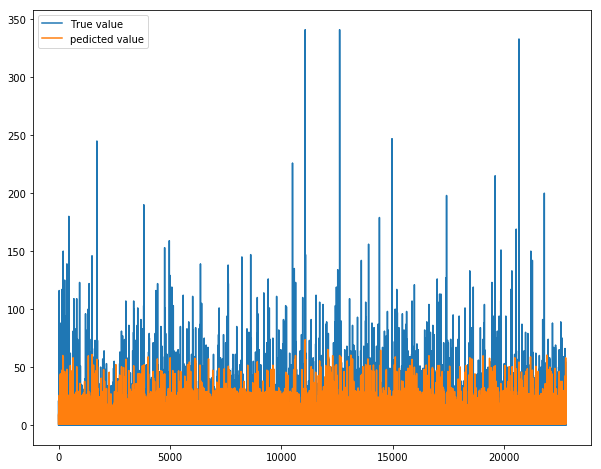

In [60]:
model =AdaBoostRegressor(n_estimators=100, loss='linear', learning_rate=0.01)
ytest1 = np.array(ytest1)
#y_test1 = np.array(y_test1)
#ytest1 =ytest1.reshape(-1,1)
t = time.time()
model.fit(X_train1,y_train1)
print('Cluster 1')
print('==============================')
print('Time = ', time.time() - t)
predict1 = model.predict(X_test1)
predict1 = predict1 * ytest1.max()
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest1, predict1))
print('==============================')
print('MSE', np.sqrt(metrics.mean_squared_error(ytest1, predict1)))
print('===================================')
plt.figure(figsize=(10,8))
plt.plot(ytest1)
plt.plot(predict1)
plt.legend(['True value', 'pedicted value'])
plt.savefig('adaboostCl1.svg', dpi=3000)
plt.show()
#X.shape, y.shape, X1.shape, y1.shape

# cluster 2

In [41]:
pre_gs_inst.fit(X_train2, y_train2)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV] learning_rate=0.01, loss=linear, n_estimators=50 ................
[CV] learning_rate=0.01, loss=linear, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=linear, n_estimators=50 ................
[CV] learning_rate=0.01, loss=linear, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=square, n_estimators=50 ................
[CV] learning_rate=0.01, loss=square, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=square, n_estimators=50 ................
[CV] learning_rate=0.01, loss=square, n_estimators=100 ...............
[CV] ....... learning_rate=0.01, loss=linear, n_estimators=50 -   0.0s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50 ...........
[CV] ....... learning_rate=0.01, loss=square, n_estimators=50 -   0.0s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50 ...........
[CV] ....... learning_rate=0.01, loss=square, n_estimators=50 -   0.0s
[CV] learning_ra

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s


[CV] learning_rate=0.1, loss=exponential, n_estimators=100 ...........
[CV] ....... learning_rate=0.1, loss=linear, n_estimators=100 -   0.0s
[CV] learning_rate=0.3, loss=linear, n_estimators=50 .................
[CV] ....... learning_rate=0.1, loss=linear, n_estimators=100 -   0.0s
[CV] learning_rate=0.3, loss=linear, n_estimators=50 .................
[CV] ... learning_rate=0.1, loss=exponential, n_estimators=50 -   0.0s
[CV] ... learning_rate=0.1, loss=exponential, n_estimators=50 -   0.0s
[CV] learning_rate=0.3, loss=linear, n_estimators=100 ................
[CV] learning_rate=0.3, loss=linear, n_estimators=100 ................
[CV] ........ learning_rate=0.3, loss=linear, n_estimators=50 -   0.0s
[CV] ....... learning_rate=0.1, loss=square, n_estimators=100 -   0.0s
[CV] learning_rate=0.3, loss=square, n_estimators=50 .................
[CV] learning_rate=0.3, loss=square, n_estimators=50 .................
[CV] ........ learning_rate=0.3, loss=linear, n_estimators=50 -   0.0s
[CV] .

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished


GridSearchCV(cv=2, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=42),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential'], 'n_estimators': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [42]:
pre_gs_inst.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}

Cluster 2
Time =  0.19729161262512207
R^2 score 0.08976006526070757
MSE 23.43510297055198


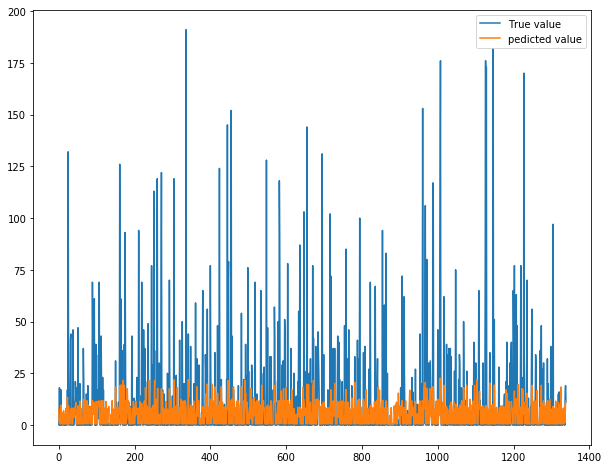

In [61]:
model1 =AdaBoostRegressor(n_estimators=50, loss='exponential', learning_rate=0.01)
ytest2 = np.array(ytest2)
y_test2 = np.array(y_test2)
#ytest1 =ytest1.reshape(-1,1)
t = time.time()
model1.fit(X_train2,y_train2)
print('Cluster 2')
print('==============================')
print('Time = ', time.time() - t)
predict2 = model1.predict(X_test2)
predict2= predict2*ytest2.max()
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest2, predict2))
print('==============================')
print('MSE', np.sqrt(metrics.mean_squared_error(ytest2, predict2)))
print('===================================')
plt.figure(figsize=(10,8))
plt.plot(ytest2)
plt.plot(predict2)
plt.legend(['True value', 'pedicted value'])
plt.savefig('adaboostCl2.svg', dpi=3000)
plt.show()
#X.shape, y.shape, X1.shape, y1.shape

# Cluster 3

In [48]:
pre_gs_inst.fit(X_train3, y_train3)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV] learning_rate=0.01, loss=linear, n_estimators=50 ................
[CV] learning_rate=0.01, loss=linear, n_estimators=50 ................
[CV] learning_rate=0.01, loss=linear, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=linear, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=square, n_estimators=50 ................
[CV] learning_rate=0.01, loss=square, n_estimators=50 ................
[CV] learning_rate=0.01, loss=square, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=square, n_estimators=100 ...............
[CV] ....... learning_rate=0.01, loss=linear, n_estimators=50 -   0.2s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50 ...........
[CV] ....... learning_rate=0.01, loss=linear, n_estimators=50 -   0.2s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50 ...........
[CV] ....... learning_rate=0.01, loss=square, n_estimators=50 -   0.2s
[CV] learning_ra

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s


[CV] ....... learning_rate=0.1, loss=linear, n_estimators=100 -   0.2s
[CV] learning_rate=0.1, loss=exponential, n_estimators=100 ...........
[CV] ........ learning_rate=0.1, loss=square, n_estimators=50 -   0.2s
[CV] learning_rate=0.1, loss=exponential, n_estimators=100 ...........
[CV] ........ learning_rate=0.1, loss=square, n_estimators=50 -   0.1s
[CV] learning_rate=0.3, loss=linear, n_estimators=50 .................
[CV] ... learning_rate=0.1, loss=exponential, n_estimators=50 -   0.2s
[CV] learning_rate=0.3, loss=linear, n_estimators=50 .................
[CV] ....... learning_rate=0.1, loss=linear, n_estimators=100 -   0.3s
[CV] learning_rate=0.3, loss=linear, n_estimators=100 ................
[CV] ... learning_rate=0.1, loss=exponential, n_estimators=50 -   0.2s
[CV] learning_rate=0.3, loss=linear, n_estimators=100 ................
[CV] ........ learning_rate=0.3, loss=linear, n_estimators=50 -   0.1s
[CV] learning_rate=0.3, loss=square, n_estimators=50 .................
[CV] .

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   13.7s finished


GridSearchCV(cv=2, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=42),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential'], 'n_estimators': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [49]:
pre_gs_inst.best_params_

{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100}

Cluster 3
Time =  2.766026735305786
R^2 score 0.2627455643070318
MSE 17.43045765804165


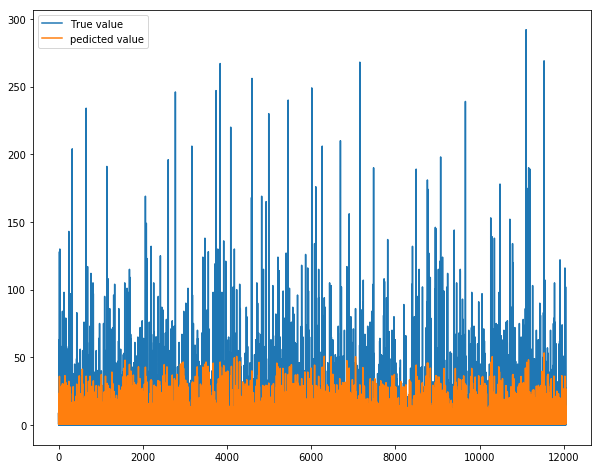

In [62]:
model2 =AdaBoostRegressor(n_estimators=100, loss='linear', learning_rate=0.01)
ytest3 = np.array(ytest3)
y_test3 = np.array(y_test3)
#ytest1 =ytest1.reshape(-1,1)
t = time.time()
model2.fit(X_train3,y_train3)
print('Cluster 3')
print('==============================')
print('Time = ', time.time() - t)
predict3 = model2.predict(X_test3)
predict3 = predict3*ytest3.max()
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest3, predict3))
print('==============================')
print('MSE', np.sqrt(metrics.mean_squared_error(ytest3, predict3)))
print('===================================')
plt.figure(figsize=(10,8))
plt.plot(ytest3)
plt.plot(predict3)
plt.legend(['True value', 'pedicted value'])
plt.savefig('adaboostCl3.svg', dpi=3000)
plt.show()
#X.shape, y.shape, X1.shape, y1.shape

# cluster 4

In [51]:
pre_gs_inst.fit(X_train4, y_train4)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV] learning_rate=0.01, loss=linear, n_estimators=50 ................
[CV] learning_rate=0.01, loss=linear, n_estimators=50 ................
[CV] learning_rate=0.01, loss=linear, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=linear, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=square, n_estimators=50 ................
[CV] learning_rate=0.01, loss=square, n_estimators=50 ................
[CV] learning_rate=0.01, loss=square, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=square, n_estimators=100 ...............
[CV] ....... learning_rate=0.01, loss=linear, n_estimators=50 -   0.1s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50 ...........
[CV] ....... learning_rate=0.01, loss=linear, n_estimators=50 -   0.1s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50 ...........
[CV] ....... learning_rate=0.01, loss=square, n_estimators=50 -   0.1s
[CV] learning_ra

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s


[CV] . learning_rate=0.05, loss=exponential, n_estimators=100 -   0.1s
[CV] ........ learning_rate=0.1, loss=square, n_estimators=50 -   0.1s
[CV] learning_rate=0.1, loss=exponential, n_estimators=50 ............
[CV] learning_rate=0.1, loss=exponential, n_estimators=100 ...........
[CV] ....... learning_rate=0.1, loss=linear, n_estimators=100 -   0.1s
[CV] learning_rate=0.1, loss=exponential, n_estimators=100 ...........
[CV] ........ learning_rate=0.1, loss=square, n_estimators=50 -   0.1s
[CV] learning_rate=0.3, loss=linear, n_estimators=50 .................
[CV] ... learning_rate=0.1, loss=exponential, n_estimators=50 -   0.1s
[CV] learning_rate=0.3, loss=linear, n_estimators=50 .................
[CV] ....... learning_rate=0.1, loss=linear, n_estimators=100 -   0.1s
[CV] learning_rate=0.3, loss=linear, n_estimators=100 ................
[CV] ... learning_rate=0.1, loss=exponential, n_estimators=50 -   0.1s
[CV] learning_rate=0.3, loss=linear, n_estimators=100 ................
[CV] .

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.7s finished


GridSearchCV(cv=2, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=42),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential'], 'n_estimators': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [52]:
pre_gs_inst.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}

Cluster 4
Time =  0.45001673698425293
R^2 score 0.3156812333379436
MSE 24.947693808942784


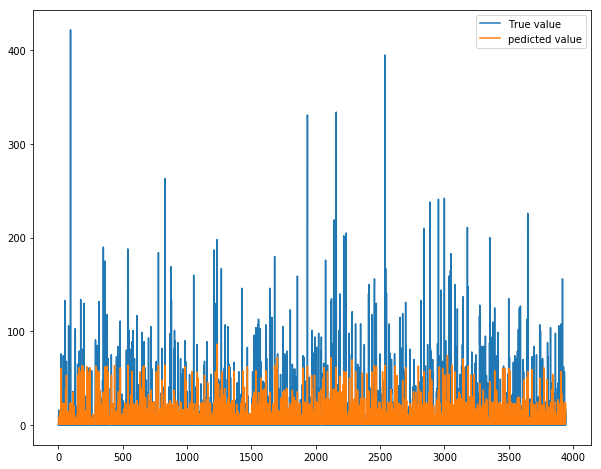

In [65]:
model3 =AdaBoostRegressor(n_estimators=50, loss='exponential', learning_rate=0.01)
ytest4 = np.array(ytest4)
y_test4 = np.array(y_test4)
#ytest1 =ytest1.reshape(-1,1)
t = time.time()
model3.fit(X_train4,y_train4)
print('Cluster 4')
print('==============================')
print('Time = ', time.time() - t)
predict4 = model3.predict(X_test4)
predict4 = predict4*ytest4.max()
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest4, predict4))
print('==============================')
print('MSE', np.sqrt(metrics.mean_squared_error(ytest4, predict4)))
print('===================================')
plt.figure(figsize=(10,8))
plt.plot(ytest4)
plt.plot(predict4)
plt.legend(['True value', 'pedicted value'])
plt.savefig('adaboostCl4.svg', dpi=3000)
plt.show()
#X.shape, y.shape, X1.shape, y1.shape

In [54]:
pre_gs_inst.fit(X_train5, y_train5)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV] learning_rate=0.01, loss=linear, n_estimators=50 ................
[CV] learning_rate=0.01, loss=linear, n_estimators=50 ................
[CV] learning_rate=0.01, loss=linear, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=linear, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=square, n_estimators=50 ................
[CV] learning_rate=0.01, loss=square, n_estimators=100 ...............
[CV] learning_rate=0.01, loss=square, n_estimators=50 ................
[CV] learning_rate=0.01, loss=square, n_estimators=100 ...............
[CV] ....... learning_rate=0.01, loss=linear, n_estimators=50 -   0.1s
[CV] ....... learning_rate=0.01, loss=linear, n_estimators=50 -   0.1s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50 ...........
[CV] learning_rate=0.01, loss=exponential, n_estimators=50 ...........
[CV] ....... learning_rate=0.01, loss=square, n_estimators=50 -   0.1s
[CV] ....... lea

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s


[CV] ........ learning_rate=0.1, loss=square, n_estimators=50 -   0.1s
[CV] ........ learning_rate=0.1, loss=square, n_estimators=50 -   0.1s
[CV] learning_rate=0.1, loss=exponential, n_estimators=100 ...........
[CV] learning_rate=0.1, loss=exponential, n_estimators=100 ...........
[CV] ....... learning_rate=0.1, loss=linear, n_estimators=100 -   0.2s
[CV] learning_rate=0.3, loss=linear, n_estimators=50 .................
[CV] ....... learning_rate=0.1, loss=linear, n_estimators=100 -   0.2s
[CV] learning_rate=0.3, loss=linear, n_estimators=50 .................
[CV] ... learning_rate=0.1, loss=exponential, n_estimators=50 -   0.1s
[CV] learning_rate=0.3, loss=linear, n_estimators=100 ................
[CV] ... learning_rate=0.1, loss=exponential, n_estimators=50 -   0.1s
[CV] learning_rate=0.3, loss=linear, n_estimators=100 ................
[CV] ........ learning_rate=0.3, loss=linear, n_estimators=50 -   0.0s
[CV] learning_rate=0.3, loss=square, n_estimators=50 .................
[CV] .

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.0s finished


GridSearchCV(cv=2, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=42),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential'], 'n_estimators': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [55]:
pre_gs_inst.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100}

Cluster 5
Time =  1.5463659763336182
R^2 score 0.30560923404487417
MSE 19.934274941573612


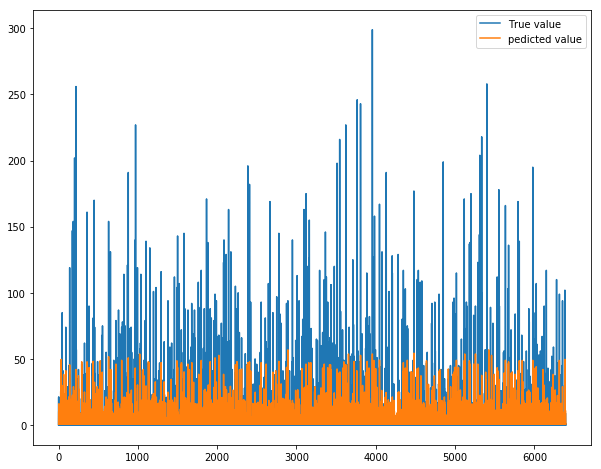

In [64]:
model5 =AdaBoostRegressor(n_estimators=100, loss='exponential', learning_rate=0.01)
ytest5 = np.array(ytest5)
y_test5 = np.array(y_test5)
#ytest1 =ytest1.reshape(-1,1)
t = time.time()
model5.fit(X_train5,y_train5)
print('Cluster 5')
print('==============================')
print('Time = ', time.time() - t)
predict5 = model3.predict(X_test5)
predict5 = predict5*ytest5.max()
print('==============================')
print('R^2 score' ,metrics.r2_score(ytest5, predict5))
print('==============================')
print('MSE', np.sqrt(metrics.mean_squared_error(ytest5, predict5)))
print('===================================')
plt.figure(figsize=(10,8))
plt.plot(ytest5)
plt.plot(predict5)
plt.legend(['True value', 'pedicted value'])
plt.savefig('adaboostCl5.svg', dpi=3000)
plt.show()
#X.shape, y.shape, X1.shape, y1.shape